# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download eight HLC\*fits.gz files (and recall how you can use `astropy.io.fits` to load these)

The HLC files are each different bands on the sky.

For each HLC file, separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars.

For each HLC file, and separately for stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (recall we did this with `seaborn`'s `jointplot`, but you can use whatever).

Estimate a bivariate distribution for `density(r, g-i)` this sample (recall we did with `seaborn`'s `jointplot` use `kde`, but you can use whatever).

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.

Comment on the structure in stars vs galaxies, and the evolution with position on the sky in each HLC.


In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from astroML.stats import binned_statistic_2d

In [2]:
data_path = '..//..//..//outside_data//'
HLC_file_list = os.listdir(data_path)

In [3]:
hdul = fits.open(data_path + HLC_file_list[0] + '//' + HLC_file_list[0])

In [4]:
hdul[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.6a           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  980 /Number of bytes per row                         
NAXIS2  =               446842 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   77 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [5]:
Mean_obj_type=[]
for i in range(hdul[1].data.shape[0]):
    Mean_obj_type.append(hdul[1].data[i][32])
Mean_obj_type=np.array(Mean_obj_type)

In [6]:
Magnitudes=[]
for i in range(hdul[1].data.shape[0]):
    Magnitudes.append(hdul[1].data[i][5])
Magnitudes = np.array(Magnitudes)

In [7]:
RA_PM = []
for i in range(hdul[1].data.shape[0]):
    RA_PM.append(hdul[1].data[i][37])
RA_PM=np.array(RA_PM)

In [8]:
DEC_PM=[]
for i in range(hdul[1].data.shape[0]):
    DEC_PM.append(hdul[1].data[i][49])
DEC_PM=np.array(DEC_PM)

In [9]:
stars_r = Magnitudes[5<=Mean_obj_type][:,2]
stars_g_i = Magnitudes[5<=Mean_obj_type][:,1] - Magnitudes[5<=Mean_obj_type][:,3]
gal_r = Magnitudes[5<Mean_obj_type][:,2]
gal_g_i = Magnitudes[5<Mean_obj_type][:,1] - Magnitudes[5<Mean_obj_type][:,3]
stars_ra = RA_PM[5<=Mean_obj_type]
stars_dec = DEC_PM[5<=Mean_obj_type]
gal_ra = RA_PM[5<Mean_obj_type]
gal_dec = DEC_PM[5<Mean_obj_type]
#three figure plot

In [3]:
def Threeplot(stars_r,stars_g_i,stars_ra,stars_dec):
    # Author: Jake VanderPlas <vanderplas@astro.washington.edu>
    # License: BSD
    #   The figure is an example from astroML: see http://astroML.github.com
    #------------------------------------------------------------
    # Plot the results using the binned_statistic function


    N, xedges, yedges = binned_statistic_2d(stars_r, stars_g_i, stars_ra,
                                            'count', bins=100) #values array is not refernced in count mode
    ra_mean, xedges, yedges = binned_statistic_2d(stars_r, stars_g_i, np.abs(stars_ra),
                                            'mean', bins=100)
    dec_mean, xedges, yedges = binned_statistic_2d(stars_r, stars_g_i, np.abs(stars_dec),
                                            'mean', bins=100)
    # Define custom colormaps: Set pixels with no sources to white
    cmap = plt.cm.jet
    cmap.set_bad('w', 1.)

    cmap_multicolor = plt.cm.jet
    cmap_multicolor.set_bad('w', 1.)

    # Create figure and subplots
    fig = plt.figure(figsize=(8, 4))
    fig.subplots_adjust(wspace=0.25, left=0.1, right=0.95,
                        bottom=0.07, top=0.95)

    #--------------------
    # First axes:
    plt.subplot(131)
    plt.imshow(np.log10(N.T), origin='lower',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
               aspect='auto', interpolation='nearest', cmap=cmap)
    plt.xlim(xedges[-1], xedges[0])
    plt.ylim(yedges[-1], yedges[0])
    plt.title('Density')
    plt.xlabel('r')
    plt.ylabel('g-i')
    cb = plt.colorbar(ticks=[0, 1, 2, 3],
                      format=r'$10^{%i}$', orientation='horizontal')
    cb.set_label(r'$\mathrm{number\ in\ pixel}$')
    plt.clim(0, 3)

    #--------------------
    # Third axes:
    plt.subplot(132)
    plt.imshow(ra_mean.T, origin='lower',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
               aspect='auto', interpolation='nearest', cmap=cmap_multicolor)
    plt.xlim(xedges[-1], xedges[0])
    plt.ylim(yedges[-1], yedges[0])
    plt.xlabel('r')
    plt.title('Proper Motion in RA')
    minimum=min(stars_ra)
    maximum=max(stars_ra)
    cb = plt.colorbar(ticks=[minimum,minimum+round((maximum-minimum),3)/2,maximum],orientation='horizontal')
    cb.set_label('mean |proper RA|')
    plt.clim(0, 0.02)

    # Draw density contours over the colors
    levels = np.linspace(0, np.log10(N.max()), 7)[2:]
    plt.contour(np.log10(N.T), levels, colors='k', linewidths=1,
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

    #--------------------
    # Third axes:
    plt.subplot(133)
    plt.imshow(dec_mean.T, origin='lower',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
               aspect='auto', interpolation='nearest', cmap=cmap_multicolor)
    plt.xlim(xedges[-1], xedges[0])
    plt.ylim(yedges[-1], yedges[0])
    plt.xlabel('r')
    plt.title('Proper Motion in DEC')
    minimum=min(stars_dec)
    maximum=max(stars_dec)
    cb = plt.colorbar(ticks=[minimum,minimum+round((maximum-minimum),3)/2,maximum],orientation='horizontal')
    cb.set_label('mean |proper DEC|')
    plt.clim(0, 0.02)

    # Draw density contours over the colors
    levels = np.linspace(0, np.log10(N.max()), 7)[2:]
    plt.contour(np.log10(N.T), levels, colors='k', linewidths=1,
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

    plt.show()

Three panel plot for HLC.RA_00_to_01.fits, stars


C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\astroML\stats\_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log10
C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log10


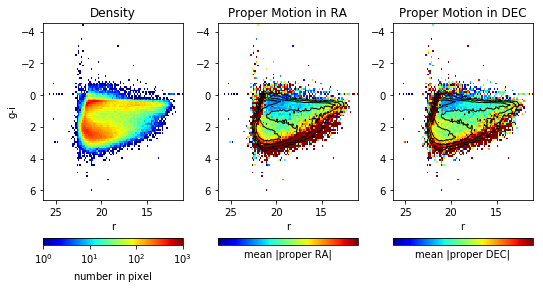

Three panel plot for HLC.RA_00_to_01.fits, galaxies


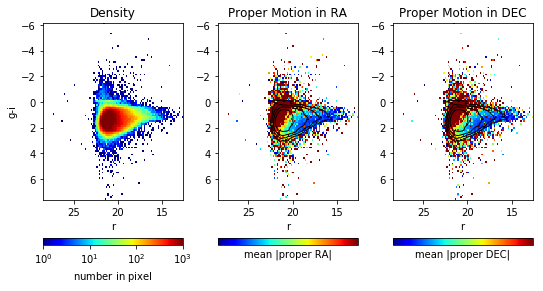

Three panel plot for HLC.RA_01_to_02.fits, stars


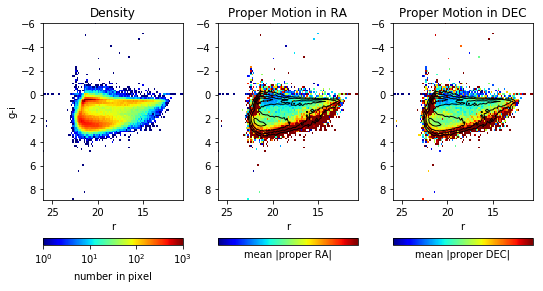

Three panel plot for HLC.RA_01_to_02.fits, galaxies


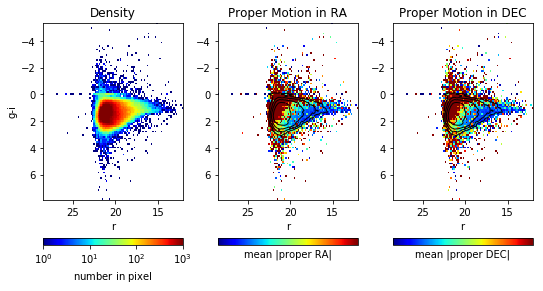

Three panel plot for HLC.RA_02_to_03.fits, stars


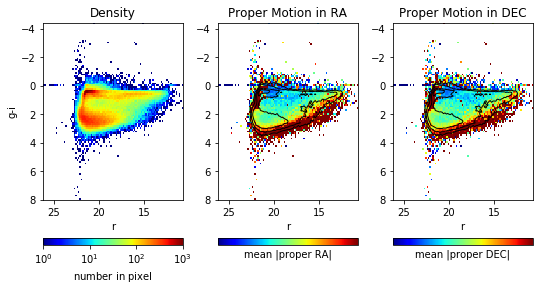

Three panel plot for HLC.RA_02_to_03.fits, galaxies


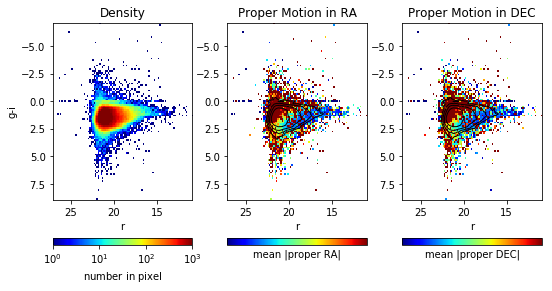

Three panel plot for HLC.RA_03_to_04.fits, stars


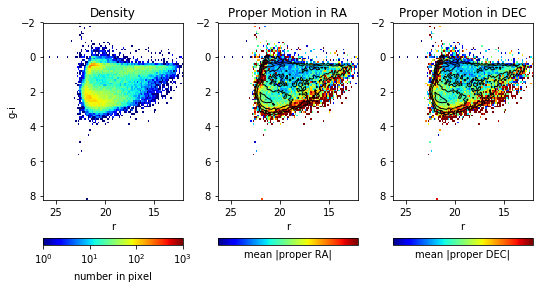

Three panel plot for HLC.RA_03_to_04.fits, galaxies


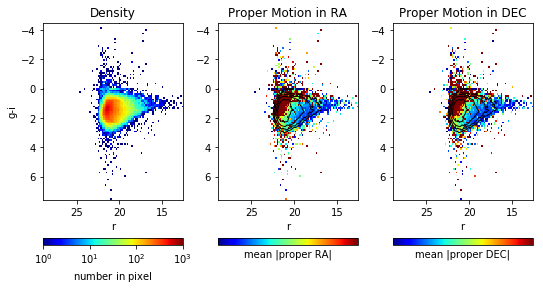

Three panel plot for HLC.RA_20_to_21.fits, stars


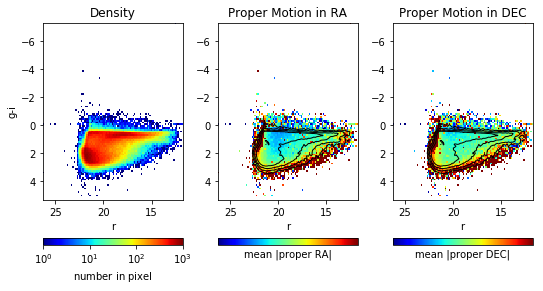

Three panel plot for HLC.RA_20_to_21.fits, galaxies


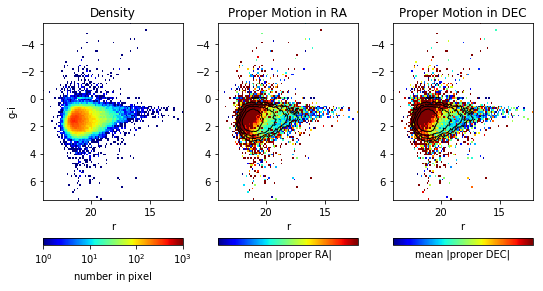

Three panel plot for HLC.RA_21_to_22.fits, stars


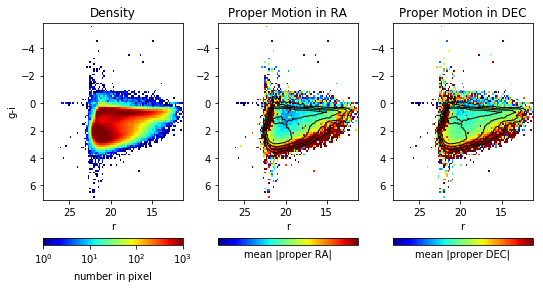

Three panel plot for HLC.RA_21_to_22.fits, galaxies


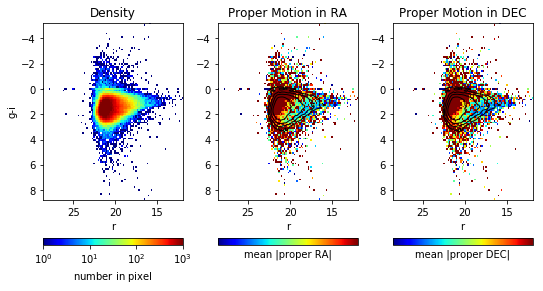

Three panel plot for HLC.RA_22_to_23.fits, stars


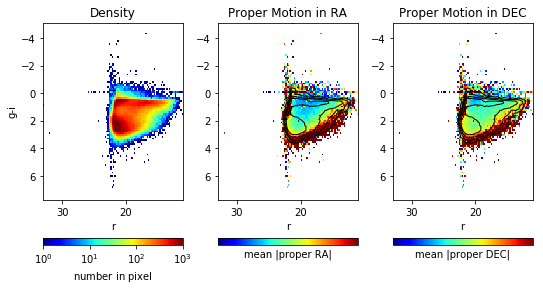

Three panel plot for HLC.RA_22_to_23.fits, galaxies


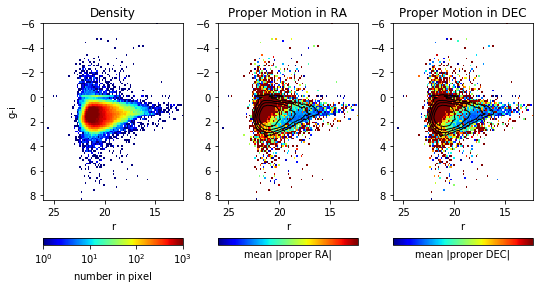

Three panel plot for HLC.RA_23_to_24.fits, stars


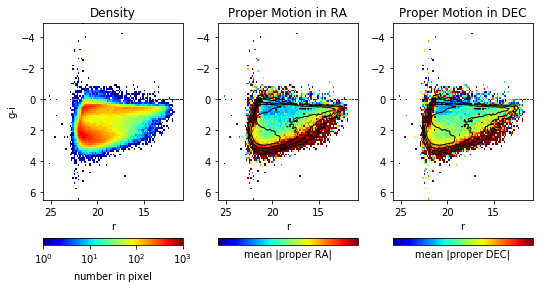

Three panel plot for HLC.RA_23_to_24.fits, galaxies


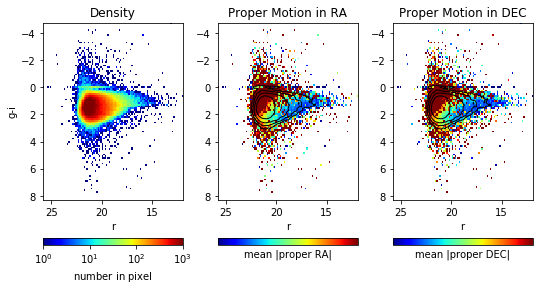

In [13]:
for j,file in enumerate(HLC_file_list):
    
    hdul = fits.open(data_path + file + '//' + file)
    
    Mean_obj_type=[]
    for i in range(hdul[1].data.shape[0]):
        Mean_obj_type.append(hdul[1].data[i][32])
    Mean_obj_type=np.array(Mean_obj_type)
    
    Magnitudes=[]
    for i in range(hdul[1].data.shape[0]):
        Magnitudes.append(hdul[1].data[i][5])
    Magnitudes = np.array(Magnitudes)
    
    RA_PM = []
    for i in range(hdul[1].data.shape[0]):
        RA_PM.append(hdul[1].data[i][37])
    RA_PM=np.array(RA_PM)
    
    DEC_PM=[]
    for i in range(hdul[1].data.shape[0]):
        DEC_PM.append(hdul[1].data[i][49])
    DEC_PM=np.array(DEC_PM)
    
    #cut by if correct object
    x1 = Magnitudes[5<=Mean_obj_type][:,2]
    y1 = Magnitudes[5<=Mean_obj_type][:,1] - Magnitudes[5<=Mean_obj_type][:,3]
    x2 = Magnitudes[5>Mean_obj_type][:,2]
    y2 = Magnitudes[5>Mean_obj_type][:,1] - Magnitudes[5>Mean_obj_type][:,3]
    ra1 = RA_PM[5<=Mean_obj_type]
    dec1 = DEC_PM[5<=Mean_obj_type]
    ra2 = RA_PM[5>Mean_obj_type]
    dec2 = DEC_PM[5>Mean_obj_type]
                                                                          
    def CUT(x,y,x_1,y_1): 
        #cut by g-i is between +/- 9
        #print(np.shape(x))
        #print(np.shape(y))
        #print(np.shape(x_1))
        #print(np.shape(y_1))
        boolean_1=9>y_1
        boolean_2=-9<y_1
        #cut by r is < 5
        boolean_3=5<x_1
        mask = boolean_1 & boolean_2 & boolean_3
                                                                          
        x = x[mask]
        y = y[mask]
        return x,y
    
    ra1,dec1 = CUT(ra1,dec1,x1,y1)
    ra2,dec2 = CUT(ra2,dec2,x2,y2)                                                                       
    x1,y1 = CUT(x1,y1,x1,y1)
    x2,y2 = CUT(x2,y2,x2,y2)
    
                
    print('Three panel plot for {}, stars'.format(str(file)))
    Threeplot(x1,y1,ra1,dec1)
    print('Three panel plot for {}, galaxies'.format(str(file)))
    Threeplot(x2,y2,ra2,dec2)
    
    hdul.close()

As the files go on, more galaxies have higher propermotions, (graphs become more red)

The overall structure is that there is a larger varience in the g-i for stars than in galaxies, and I think that the galaxies g-i follows a normal distribution, but the stars g-i follows a double gaussian. r in both galaxies and stars follows a boltzmann distribution (I think thats right? I mean bellshaped with fast rise then long tail).


# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

In [17]:
import statsmodels.api as sm

In [18]:
import scipy.stats as stats

In [19]:
data_path_new = '..//..//data//01//'
DF = pd.read_csv(data_path_new+'IntroStat_demo.csv')

In [20]:
#DF.head

In [21]:
print('mean: ',np.mean(DF['mag.outlier'].values))
print('varience: ',np.std(DF['mag.outlier'].values)**2)

mean:  18.561082466856572
varience:  0.005081094393001044


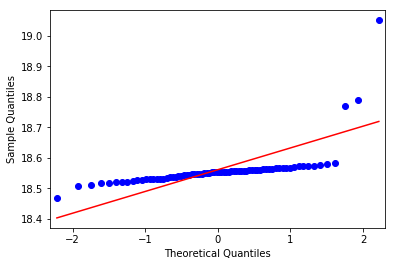

In [46]:
sm.qqplot(DF['mag.outlier'],stats.norm,line='s')
plt.show()
#x=np.linspace(-2.5,2.5,200)
#y=np.mean(DF['mag.outlier'].values) + x*(np.std(DF['mag.outlier'].values)**2)
#y=x*(np.std(DF['mag.outlier'].values)**2)
#plt.plot(x,y,label='y=x*sigma+mean')
#plt.xlim(0,2.5)
#plt.ylim(17.5,20.0)
#plt.legend()

In [69]:
DF['mag.outlier'].describe()

count    74.000000
mean     18.561082
std       0.071768
min      18.468095
25%      18.537395
50%      18.553712
75%      18.562982
max      19.050590
Name: mag.outlier, dtype: float64

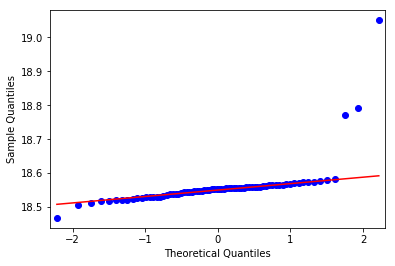

In [47]:
sm.qqplot(DF['mag.outlier'],stats.norm,line='q')

firstquartile=18.5374
thirdquartile=18.5630
minimum=18.4868
#slope=(thirdquartile-firstquartile)/(0.5)
#x1=np.linspace(-2.5,2,100)
#y1=x1*slope + thirdquartile
#plt.plot(x1,y1,'k--',label='straight line between first and third')


#x=np.linspace(-2,2.5,200)
#y=np.mean(DF['mag.outlier'].values) + x*(np.std(DF['mag.outlier'].values)**2)
#plt.plot(x,y,label='y=x*sigma+mean')
#plt.xlim(0,2.5)
#plt.ylim(17.5,20.0)
#plt.legend()
plt.show()

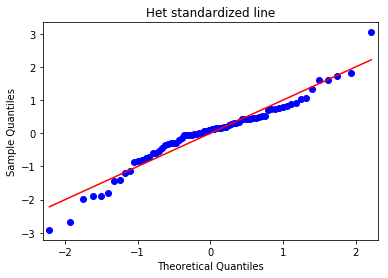

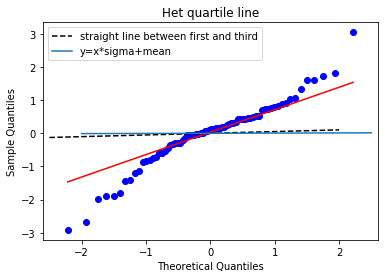

In [55]:
sm.qqplot(DF['mag.het'],stats.norm,fit=True,line='s')
plt.title('Het standardized line')
sm.qqplot(DF['mag.het'],stats.norm,fit=True,line='q')
plt.title('Het quartile line')
firstquartile=18.5374
thirdquartile=18.5630
minimum=18.4868
slope=(thirdquartile-firstquartile)/(0.5)
x1=np.linspace(-2.5,2,100)
#y1=x1*slope + thirdquartile
y1=x1*slope
plt.plot(x1,y1,'k--',label='straight line between first and third')


x=np.linspace(-2,2.5,200)
#y=np.mean(DF['mag.outlier'].values) + x*(np.std(DF['mag.outlier'].values)**2)
y=x*(np.std(DF['mag.outlier'].values)**2)
plt.plot(x,y,label='y=x*sigma+mean')
#plt.xlim(0,2.5)
#plt.ylim(17.5,20.0)
plt.legend()

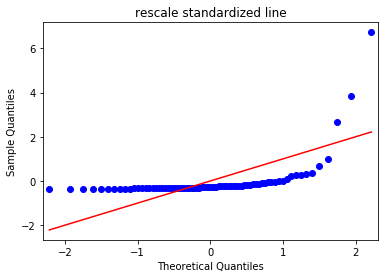

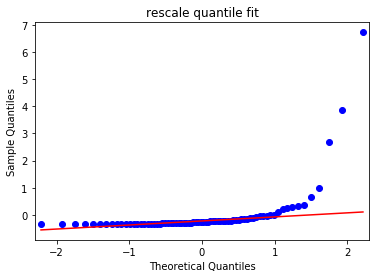

In [59]:
X = DF['mag.het'].values/DF['mag.het.error'].values - np.mean(DF['mag.het'].values)
sm.qqplot(X,stats.norm,fit=True,line='s')
plt.title('rescale standardized line')
plt.show()
sm.qqplot(X,stats.norm,fit=True,line='q')
plt.title('rescale quantile fit')
plt.show()

The Outliers are not well described by a gaussian but there is a underlying distribution that might be. Yet when I rescale the distribution the performance is worse. These plots ought to be a straight line between 0 and 1 (if the distributions are the exact same as the hypothesis distribution), so I dont understand why there are negative quantiles?



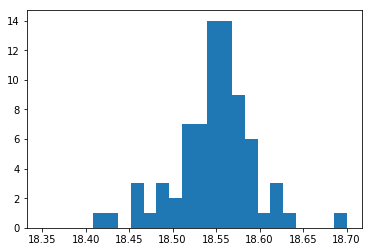

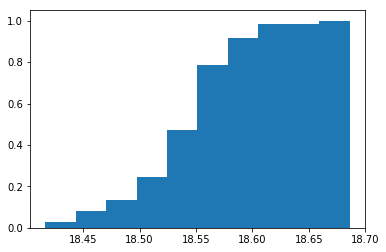

In [67]:
bins=np.linspace(18.35,18.70,25)
plt.hist(DF['mag.het'].values,bins)
plt.show()
plt.hist(DF['mag.het'].values,density=True,cumulative=True)
plt.show()

To be honest, underlying distribution doesn't seem remarkebly gasussian, probably more like a t.

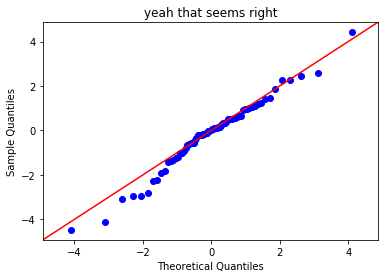

In [71]:
sm.qqplot(DF['mag.het'],stats.t,fit=True,line='45')
plt.title('yeah that seems right')
plt.show()

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.


Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).

Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.

In [6]:
DF = pd.read_csv('..//..//data//01//Cepheids.csv')

In [14]:
from scipy.stats import linregress
#slope, intercept, r_value, p_value, std_err = linregress(x,y)

In [10]:
DF.head()

,name,RA0,Decl0,Mode,Cloud,W,logP1,VI
0,OGLE-LMC-CEP-0002,4.529733,-69.81933,F,LMC,14.52500,0.493893,0.740
1,OGLE-LMC-CEP-0005,4.592089,-69.73497,F,LMC,13.49540,0.749122,0.752
2,OGLE-LMC-CEP-0012,4.630203,-67.21442,F,LMC,14.54210,0.424912,0.598
3,OGLE-LMC-CEP-0016,4.642367,-67.64631,F,LMC,12.03300,1.021456,1.080
4,OGLE-LMC-CEP-0017,4.649119,-69.68839,F,LMC,14.34215,0.565524,0.647


In [13]:
F = DF[DF['Mode']=='F']
One = DF[DF["Mode"]=='1']
SMC_F = F[F['Cloud']=='SMC']
LMC_F = F[F['Cloud']=='LMC']
SMC_1 = One[One['Cloud']=='SMC']
LMC_1 = One[One['Cloud']=='LMC']

In [58]:
def PLOT(X,Y,Z,RA,DEC):
    plt.plot(X,Y,'.')
    plt.title('W vs log(P1) with linear regression')
    plt.ylabel('W')
    plt.xlabel('log(P1)')
    slope, intercept, r_value, p_value, std_err = linregress(X,Y)
    print('slope :',slope)
    print('intercept :',intercept)
    bins = np.linspace(min(X),max(X),200)
    Model_Y = (intercept + slope*bins)
    plt.plot(bins,Model_Y,'k--')
    plt.show()
    
    residuals = Y-(intercept + slope*X)
    plt.title('residuals against model W')
    plt.plot((intercept + slope*X),residuals,'.')
    plt.ylabel('residuals')
    plt.xlabel('model W')
    plt.show()
    
    plt.plot(X,Z,'.',alpha=0.2)
    plt.title('V-I vs LogP1')
    plt.xlabel('LogP1')
    plt.ylabel('V-I')
    plt.ylim(0,2)
    plt.xlim(-1,2)
    plt.show()
    
    ### Now the Hess
    cmap = plt.cm.jet
    cmap.set_bad('w', 1.)

    cmap_multicolor = plt.cm.jet
    cmap_multicolor.set_bad('w', 1.)
    
    positive_negative = residuals
    positive_negative[0<positive_negative]=1
    positive_negative[0>positive_negative]=-1
    
    N, xedges, yedges = binned_statistic_2d(DEC, RA, positive_negative,'sum', bins=100)
    plt.imshow(np.log10(N.T), origin='lower',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
               aspect='auto', interpolation='nearest', cmap=cmap)
    plt.xlim(xedges[-1], xedges[0])
    plt.ylim(yedges[-1], yedges[0])
    plt.title('Ra vs Dec with color coded residuals')
    plt.xlabel('dec')
    plt.ylabel('ra')
    plt.colorbar()
    plt.clim(-1, 1)
    plt.show()

SMC 1
slope : -3.6154855915505526
intercept : 15.962367523361479


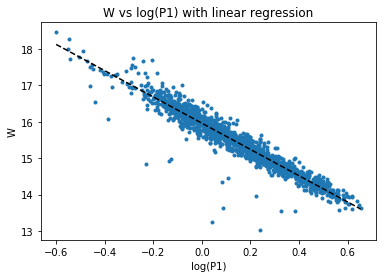

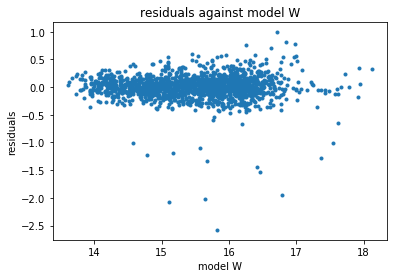

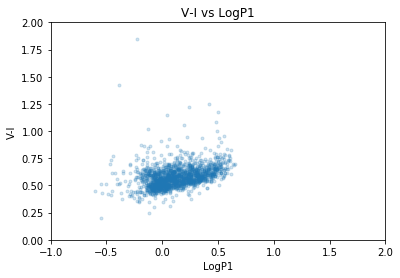

C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log10


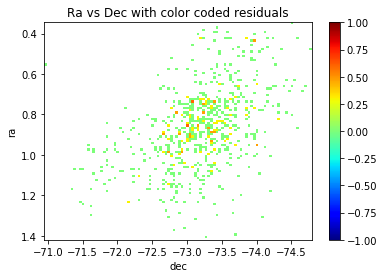

In [59]:
print('SMC 1')
PLOT(SMC_1['logP1'].values,SMC_1['W'].values,SMC_1['VI'].values,SMC_1['RA0'].values,SMC_1['Decl0'].values)

SMC F
slope : -3.453645019184599
intercept : 16.480438005465025


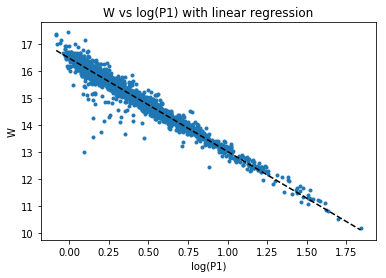

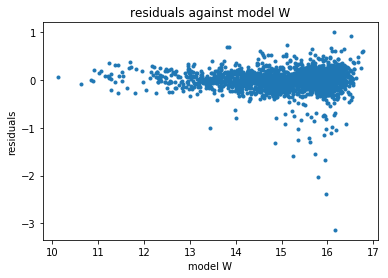

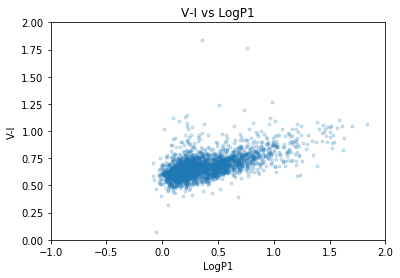

C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log10


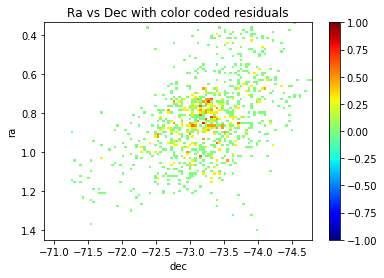

In [60]:
print('SMC F')
PLOT(SMC_F['logP1'].values,SMC_F['W'].values,SMC_F['VI'].values,SMC_F['RA0'].values,SMC_F['Decl0'].values)

LMC 1
slope : -3.432243376948585
intercept : 15.38395972005601


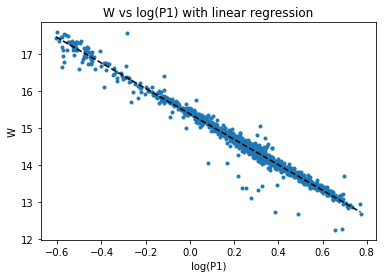

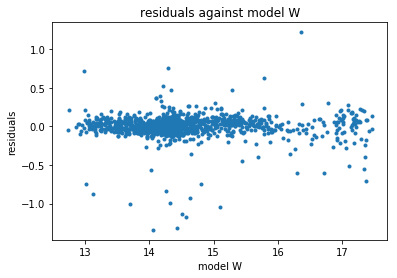

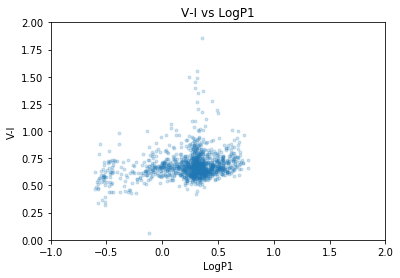

C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log10


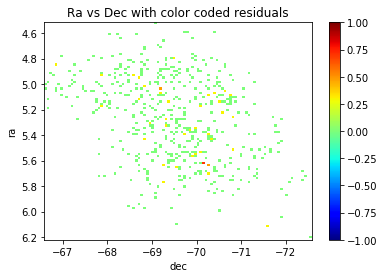

In [61]:
print('LMC 1')
PLOT(LMC_1['logP1'].values,LMC_1['W'].values,LMC_1['VI'].values,LMC_1['RA0'].values,LMC_1['Decl0'].values)

LMC F
slope : -3.3258847598549908
intercept : 15.89287088292711


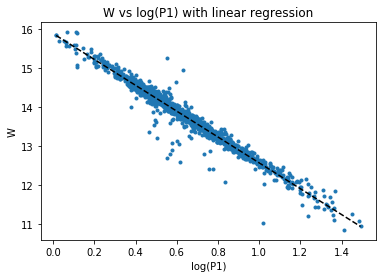

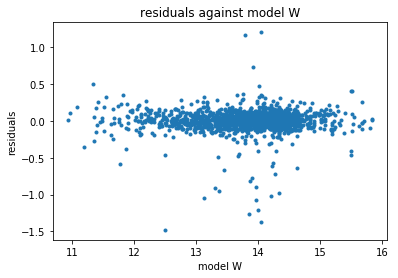

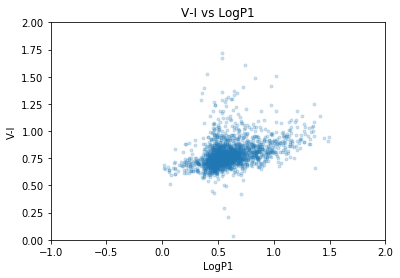

C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
C:\Users\qwsaz\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log10


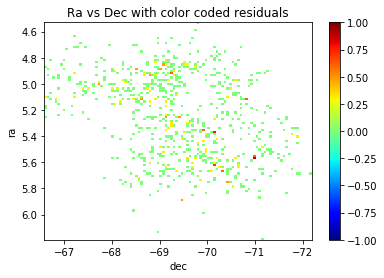

In [62]:
print('LMC F')
PLOT(LMC_F['logP1'].values,LMC_F['W'].values,LMC_F['VI'].values,LMC_F['RA0'].values,LMC_F['Decl0'].values)

First, I notice that there is a lot of green over the sum of my residuals being positive or negative. This seems to indicate that the bias of my residuals is pretty centered around 0, which is in general desirable: but furthermore that the RA and DEC bins may not be randomly distributed within the Clouds: If that were the case, then I would expect that my binning function wouldn't have so many positive risuduals near negative residuals. It seems the case that the dataset is looking at the same stars and the residuals go from positive to negative or vice versa, so that most bins are sum=0. Its also the case that because so many bins are sum zero the number of stars in that bin = some even number, which is very weird.

I also would say the linear regression of Log(P1) predicts W pretty well across each group: The fit of SMC_1 is near the fit of SMC_F is near... Which I would atleast hope is true between 1s and Fs since Cepheids in LMC and SMC should be roughly the same.

I notice the difference between SMC and LMC are that the distributions of VI seem to be different, so if VI is sensitive to extintion then I would say there is a different amount of extinction between LMC and SMC and us,

AND, that if W is just a fuction of (V-I) that there is no way you could make the linear relationship on Cepheids between period and that color without taking into account the extinction